In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dados Treinamento
dados = {'idade' : [5,10,3,8,1,15],
         'historico' : ["bom", 'ruim', 'excelente', 'regular', 'excelente', 'ruim'],
         'falhas' : [0,3,0,2,0,5],
         'automacao' : ["alto", "baixo", "medio", "alto", "medio", "baixo"],
         'classificacao' : ["segura", "nao segura", "segura", "nao segura", "segura", "nao segura"]
         }

In [3]:
df = pd.DataFrame(dados)
historico = LabelEncoder()
automacao = LabelEncoder()
classe = LabelEncoder()

In [4]:
df['historico'] = historico.fit_transform(df['historico'])
df['automacao'] = automacao.fit_transform(df['automacao'])
df['classificacao'] = classe.fit_transform(df['classificacao'])

In [5]:
x = df[['idade', 'historico', 'falhas', 'automacao']]
y = df['classificacao']

In [6]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(x,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
arvore = export_text(modelo, feature_names=list(x.columns))
print(arvore)

|--- falhas <= 1.00
|   |--- class: 1
|--- falhas >  1.00
|   |--- class: 0



In [8]:
nova_maquina = [[7, historico.transform(['bom'])[0], 1, automacao.transform(['medio'])[0]]]
previsao = modelo.predict(nova_maquina)
print(previsao)

[1]


C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


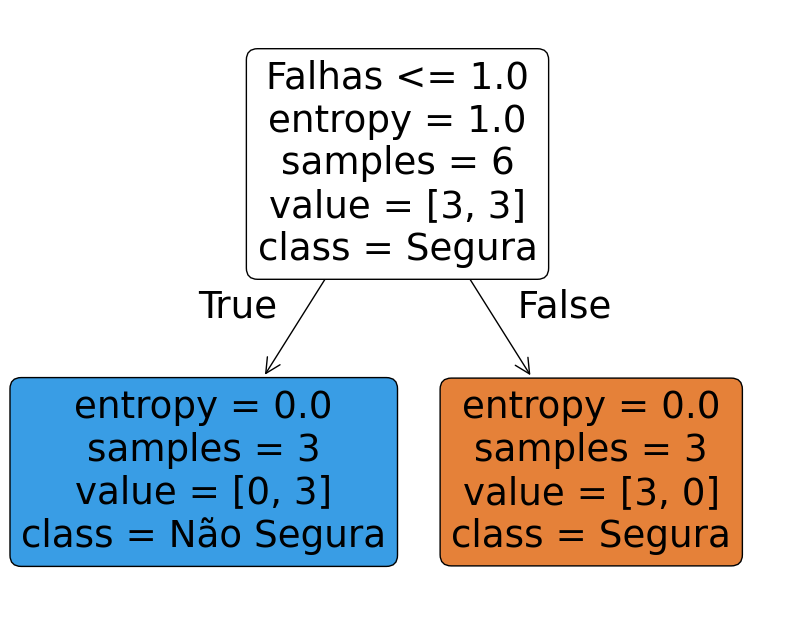

In [9]:
plt.figure(figsize=(10,8))
tree.plot_tree(
    modelo,
    feature_names=["Idade", "Histórico", "Falhas", "Automação", "Classificação"],
    class_names=["Segura", "Não Segura"],
    filled=True,
    rounded=True
)
plt.show()